# Instalar paquetes

In [1]:
! pip install chart_studio

     |████████████████████████████████| 64 kB 2.8 MB/s 


In [2]:
! pip install bqplot

     |████████████████████████████████| 1.2 MB 13.4 MB/s 


In [3]:
pip install folium

In [88]:
! pip install statsmodels


Las variables relevantes disponibles son:

* **Nombre de la entidad:** denominación verbal dada a una Entidad.
* **Departamento:** división administrativa y política (33 divisiones, 32 departamentos)
* **Municipio:** segundo nivel de división administrativa en Colombia.
* **Clasificación Orgánica:** estructura general de las entidades y organismos del poder público en Colombia: Ramas del poder público, órganos de control, órganos autónomos, órganos electorales, etc.
* **Naturaleza jurídica:** definición legal del organismo o entidad según su actividad o ubicación en la estructura del Estado (alcaldía, gobernación,etc).
* **Longitud y Latitud:** coordenadas.
* **Año:** datos del tiempo que aplica la información.
* **Sexo:** clasificación sexual
* **Educación:** referente al nivel de estudio (basica, media, pregrado, etc).
* **Número contratistas:** jóvenes cuya contratacion en las entidades del estado corresponde a la prestación de servicios.
* **Número servidores públicos:**	jóvenes vinculados en todos los tipos y clasificacion de empleado público
* **Edad:** edad del jóven




# ¿Cómo esta distribuida la representación juvenil en el gobierno?


Las variables relevantes disponibles son:

* **Nombre de la entidad:** denominación verbal dada a una Entidad.
* **Departamento:** división administrativa y política (33 divisiones, 32 departamentos)
* **Municipio:** segundo nivel de división administrativa en Colombia.
* **Clasificación Orgánica:** estructura general de las entidades y organismos del poder público en Colombia: Ramas del poder público, órganos de control, órganos autónomos, órganos electorales, etc.
* **Naturaleza jurídica:** definición legal del organismo o entidad según su actividad o ubicación en la estructura del Estado (alcaldía, gobernación,etc).
* **Longitud y Latitud:** coordenadas.
* **Año:** datos del tiempo que aplica la información.
* **Sexo:** clasificación sexual
* **Educación:** referente al nivel de estudio (basica, media, pregrado, etc).
* **Número contratistas:** jóvenes cuya contratacion en las entidades del estado corresponde a la prestación de servicios.
* **Número servidores públicos:**	jóvenes vinculados en todos los tipos y clasificacion de empleado público
* **Edad:** edad del jóven


# 1. procesamiento y limpieza de datos

In [91]:
# Paquetes Relevantes
import pandas                  as pd
import numpy                   as np
from   scipy import stats
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import chart_studio.plotly     as py
import os
import folium
from folium.plugins import HeatMap


In [79]:
# Establecer ruta de acceso en drive

from google.colab import drive
import os
drive.mount('/content/gdrive')

import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

# Establecer ruta de los datos

%cd '/content/gdrive/MyDrive/csv'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive/csv
/content/gdrive/MyDrive/csv


In [80]:
# Se nombra el csv que se va a usar

data = pd.read_csv('jovenes_gobierno.csv')

# Se cambia el formato de longitud y latitud en el csv
data[['Latitud','Longitud']]=data[['Latitud','Longitud']].apply(lambda x: x.str.replace(',','.'))

data.shape

(1306, 34)

In [81]:
# Se eliminan las columnas que no se van a utilizar 

data= data.drop(columns=['Código SIGEP', 'Nit', 'Orden', 'Suborden', 'Código DIVIPOLA Departamento', 'Código DIVIPOLA Municipio ', 'Sector', 'Nivel', 'Tipo de Vinculacíon ', 'Trimestre', 'Fuente','Sexo: No reporta'], axis=1)

In [82]:
# Se nombran de nuevo las variables para que sean mas faciles de manipular

data= data.rename(columns={"Sexo: Hombres":"Hombres", "Sexo: Mujeres":"Mujeres"})
data= data.rename(columns={"Nivel: Postgrado":"Postgrado", "Nivel: Profesional":"Profesional", "Nivel: Técnicas - Tecnológicas":"Tecnico_Tecnologo",  "Nivel: Secundaria":"Secundaria", "Nivel: Primaria":"Primaria", "Nivel: No reporta":"No reporta estudios"})
data= data.rename(columns={"Edad: 18-21":"Edad 18-21", "Edad: 22-24":"Edad 22-24", "Edad: 25-28":"Edad 25-28"})

In [83]:
data.head()

,Nombre de la entidad,Departamento,Municipio,Clasificación Orgánica,Naturaleza jurídica,Longitud,Latitud,Año,Hombres,Mujeres,Número contratistas,Número servidores públicos,Postgrado,Profesional,Tecnico_Tecnologo,Secundaria,Primaria,No reporta estudios,Edad 18-21,Edad 22-24,Edad 25-28,Edad: No reporta
0,ALCALDÍA DE GUACHUCAL,Nariño,GUACHUCAL,Ejecutiva,Alcaldía,-77.731133,.960072,2020,0,1,1,0,0,0,1,0,0,0,0,0,1,0
1,SALUD YOPAL - YOPAL,Casanare,YOPAL,Ejecutiva,Empresas Sociales del Estado,-72.400523,5.348903,2020,19,41,53,7,0,33,16,11,0,0,3,21,36,0
2,FINANCIERA DE DESARROLLO TERRITORIAL S.A.,Bogotá D.C,BOGOTÁ,Ejecutiva,Sociedad de Economía Mixta,-74.072092,4.710989,2020,2,5,7,0,3,2,2,0,0,0,1,1,5,0
3,ALCALDÍA DE MÁLAGA,Santander,MÁLAGA,Ejecutiva,Alcaldía,-72.729891,6.703858,2020,1,2,1,2,0,0,3,0,0,0,2,1,0,0
4,ALCALDÍA DE SAN LUIS DE SINCÉ,Sucre,SAN LUIS DE SINCÉ,Ejecutiva,Alcaldía,-75.146445,9.241075,2020,1,0,0,1,0,0,1,0,0,0,0,0,1,0


In [84]:
# Crear una variable del total de jovenes
total_jovenes= data['Hombres'] + data['Mujeres']

# t-Prueba

**Hipotesis Nula:** La media de la cantidad de hombres es igual a la media de la cantidad de mujeres

**Hipotesis Alterna:** Las medias son diferentes entre hombres y mujeres


In [115]:
t2, p2 = stats.ttest_ind(data['Hombres'],data['Mujeres'])
print("t = " + str(t2))
print("p = " + str(p2))

t = -3.4185083335211783
p = 0.0006393108336136048


**Pre-conclusión**

Se rechaza la hipotesis nula, lo que significa que hay evidencia para concluir que las medias no son iguales.

# 2. Análisis de los datos


**1**) Distribución por género

In [13]:
# Variables para graficar el pie chart
t_hombres= data['Hombres'].sum()
t_mujeres= data['Mujeres'].sum()

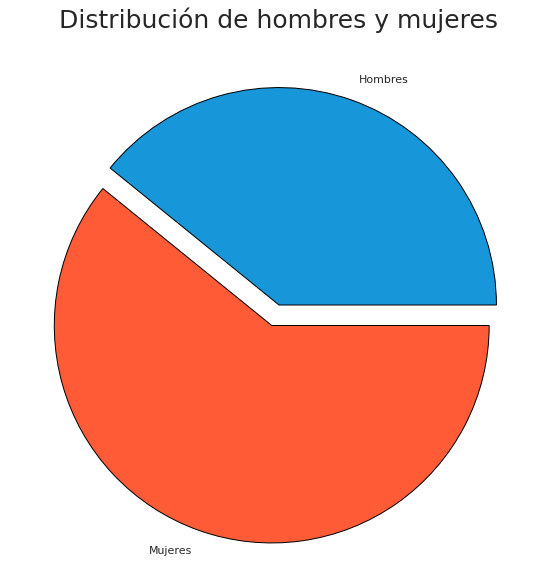

In [40]:
labels= ['Hombres','Mujeres']
sizes= [t_hombres, t_mujeres]
colors= ['#1796DA','#FF5B37']
explode = [0,0.1]

plt.figure(figsize=(15, 10))


plt.title("Distribución de hombres y mujeres",fontsize=25)
plt.pie(sizes, labels=labels, explode=explode, colors= colors, wedgeprops={'edgecolor':'black'})
plt.show()

**Pre-conclusión =** 

a diferencia de lo que se esperaba, existe mayor participación de mujeres jovenes en el gobierno que los hombres.

**2**) Contratistas vs Servidores públicos

In [19]:
t_contratistas= data['Número contratistas'].sum()
t_servidores= data['Número servidores públicos'].sum()

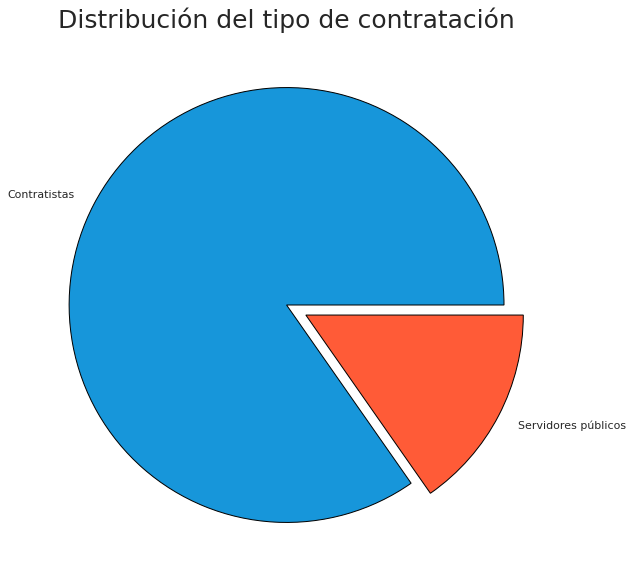

In [41]:
labels= ['Contratistas','Servidores públicos']
sizes= [t_contratistas, t_servidores]
colors= ['#1796DA','#FF5B37']
explode = [0,0.1]

plt.figure(figsize=(15, 10))

plt.title("Distribución del tipo de contratación",fontsize=25)
plt.pie(sizes, labels=labels, explode= explode, colors= colors, wedgeprops={'edgecolor':'black'})
plt.show()

**Pre-conclusión =** 

La mayor parte de jovenes vinculados al gobierno, han sido empleados como contratistas (empleados externos contratados para realizar una labor) y muy pocos son en realidad servidores públicos (funcionario quien desempeña profesionalmente un empleo público)

**3**) distribución hombres y mujeres por departamento

In [23]:
sns.set(rc = {'figure.figsize':(40,20)})

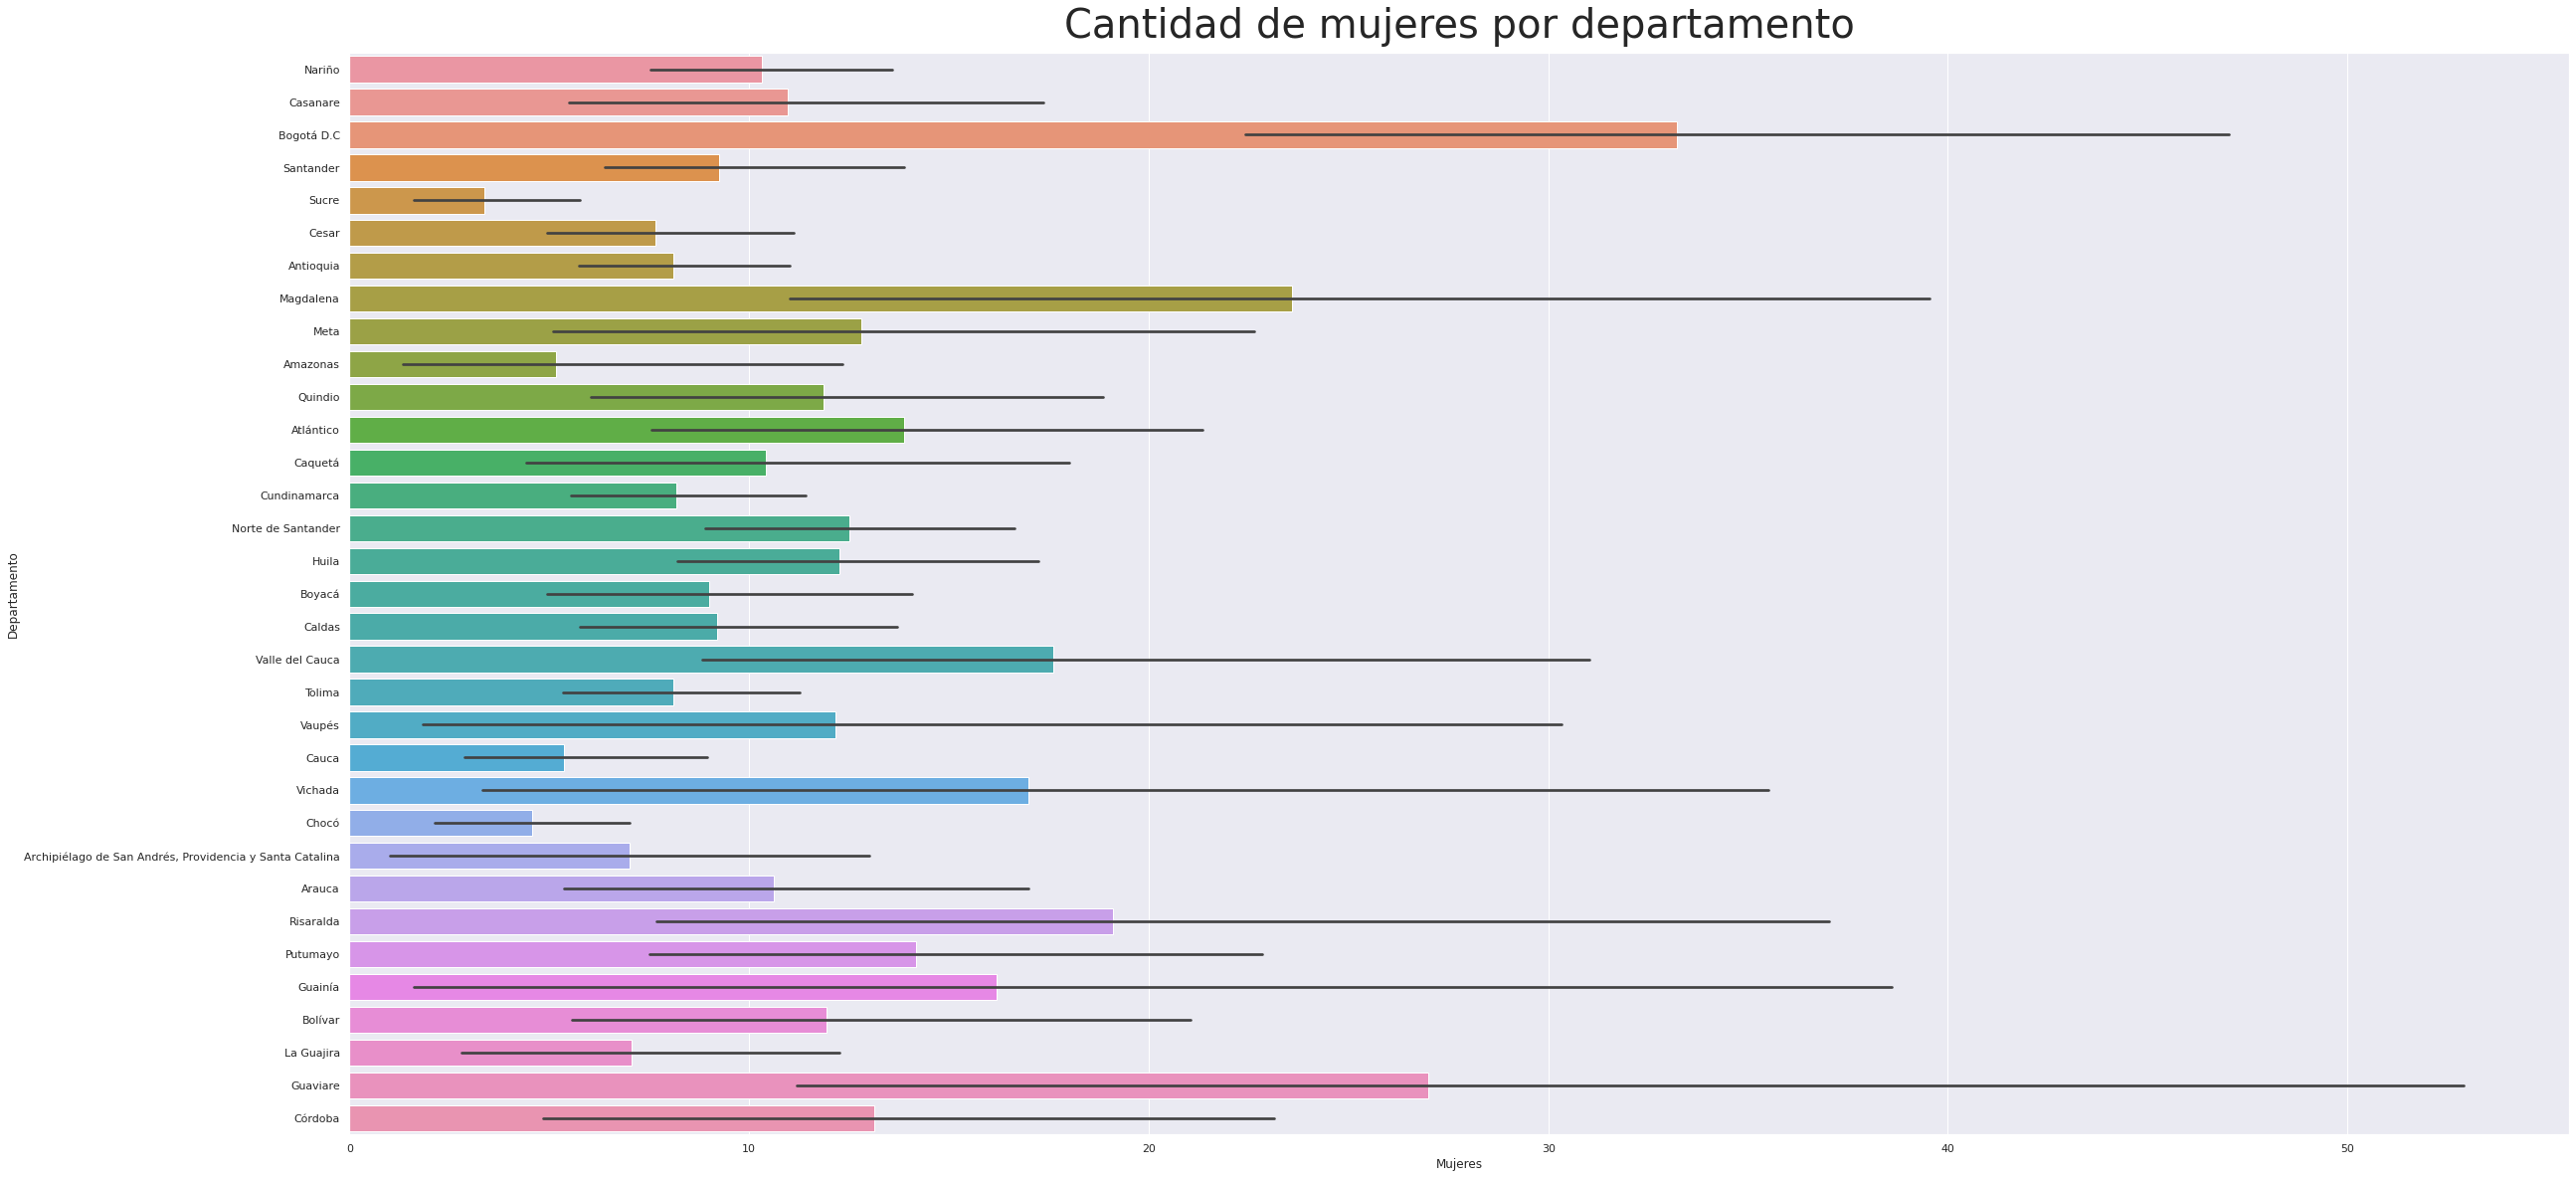

In [27]:
sns.barplot(data=data, x='Mujeres', y='Departamento')
plt.title("Cantidad de mujeres por departamento", fontsize=40, verticalalignment='bottom');

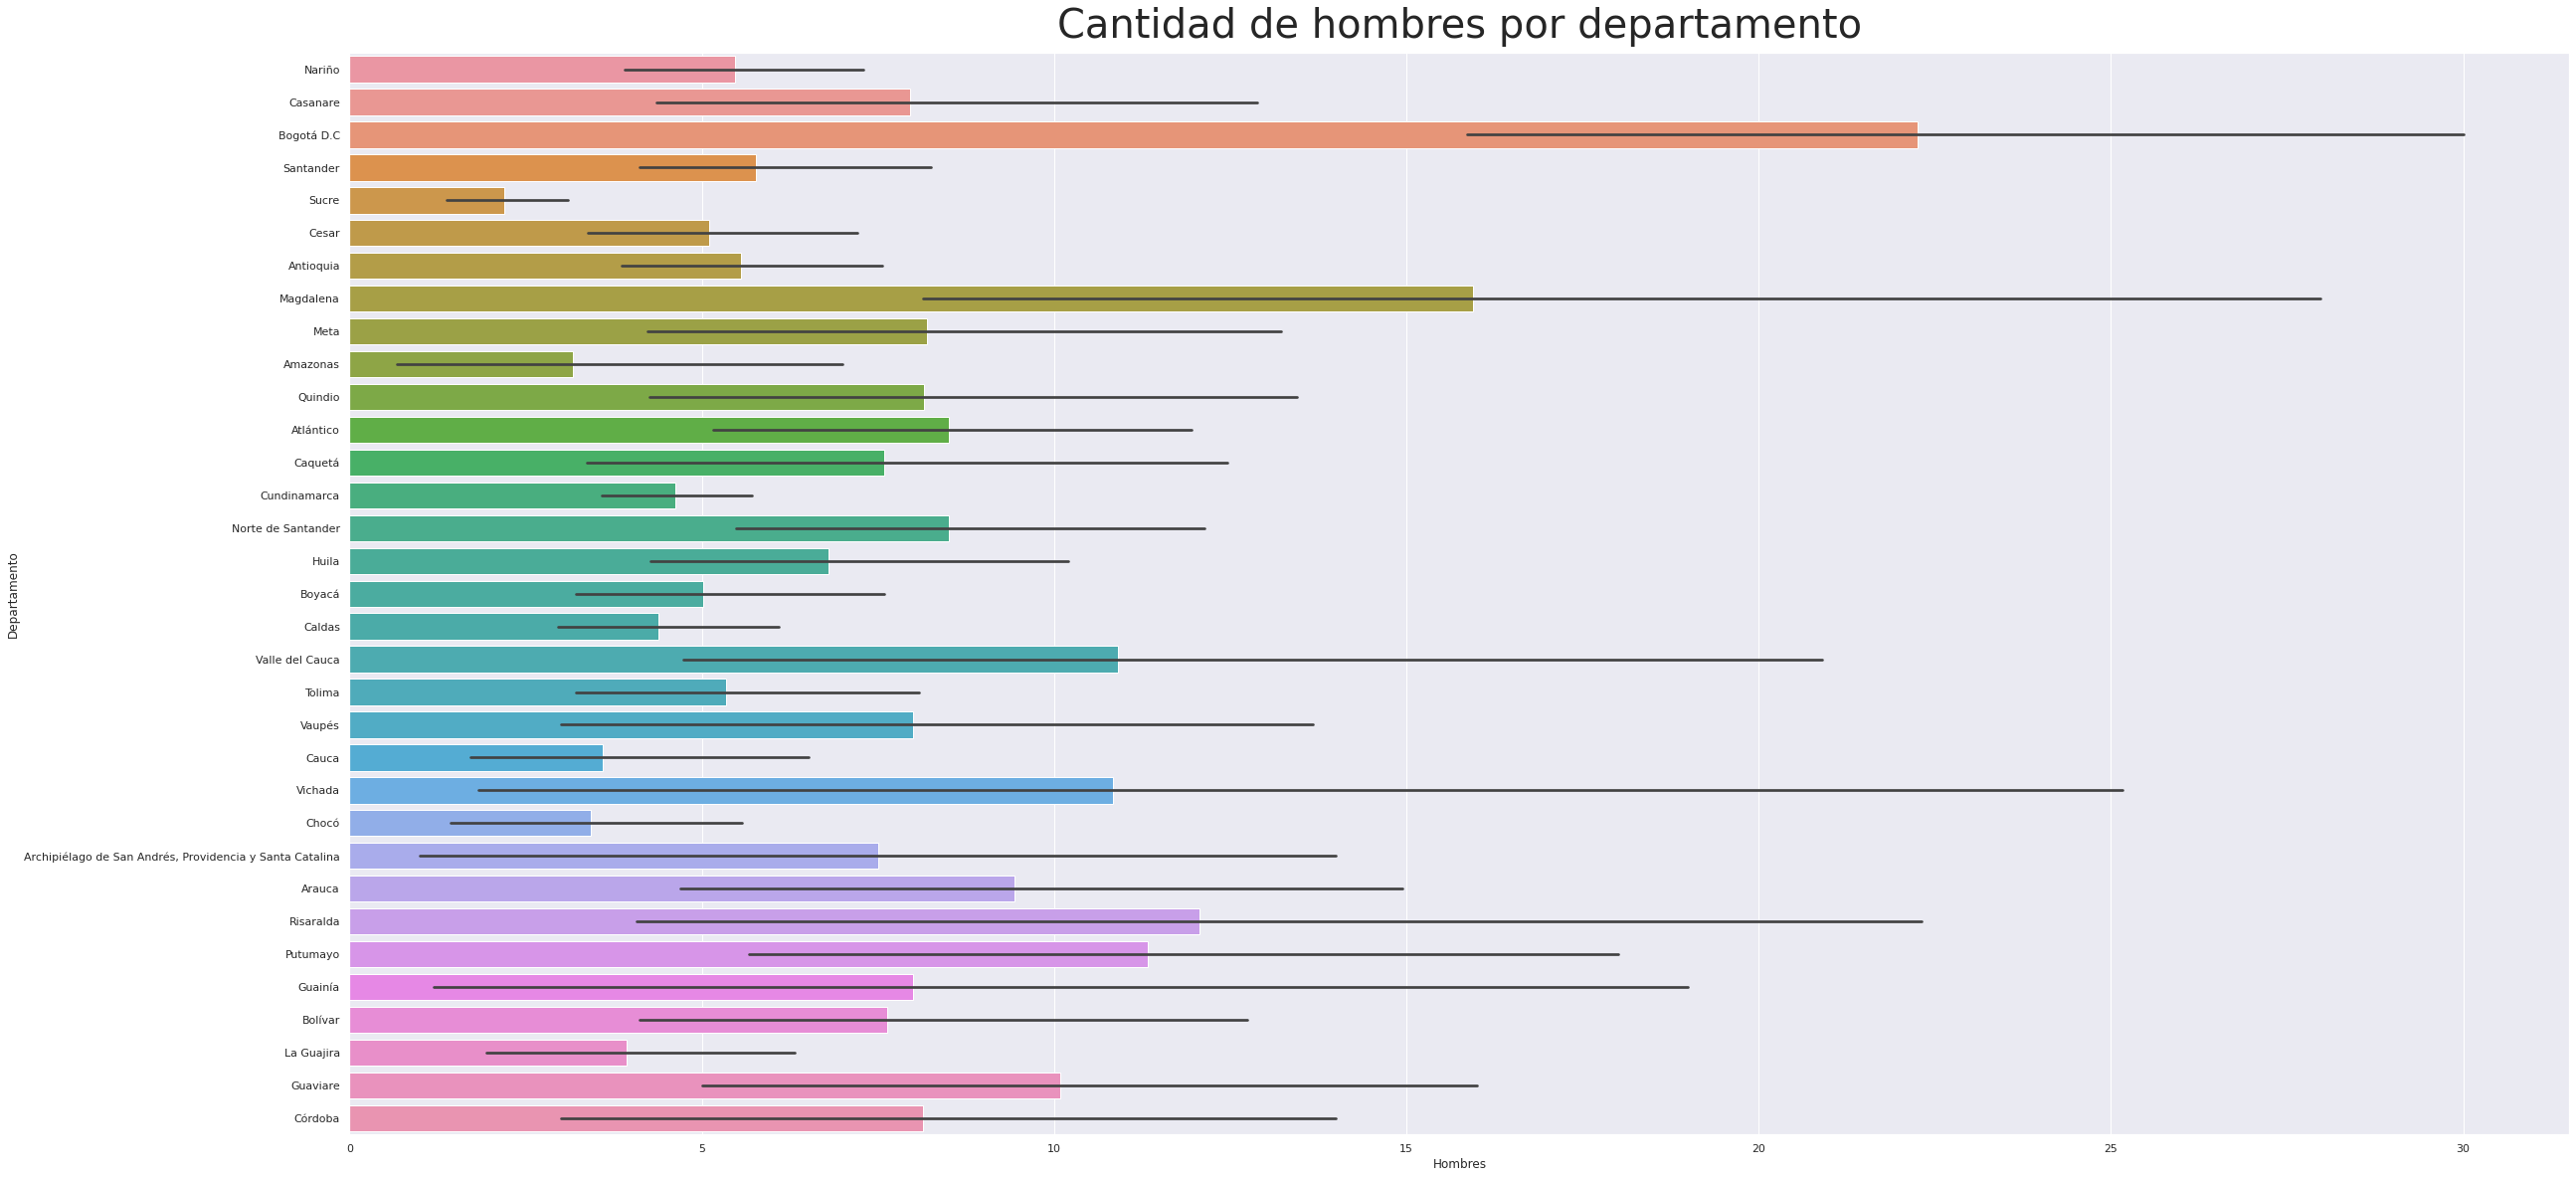

In [26]:
sns.barplot(data=data, x='Hombres', y='Departamento')
plt.title("Cantidad de hombres por departamento", fontsize=40, verticalalignment='bottom');

**Pre-conclusión =** 

Aunque a simple vista pueda parecer que ambas gráficas son muy similares lo son unicamente en distribución ya que en los valores del eje x la grafica de mujeres tiene valores mayores.

El departamento que mejor han implementado la inclusión de jovenes en el gobierno es **Bogotá**

***nota= Bogotá es un departamento municipal; ya que es el único municipio de administración directa del gobierno nacional.


**4**) distribución de los niveles educativos y edades

In [28]:
# Variables para graficar el pie chart
t_primaria= data['Primaria'].sum()
t_secundaria= data['Secundaria'].sum()
t_tec= data['Tecnico_Tecnologo'].sum()
t_profesional= data['Profesional'].sum()
t_postgrado= data['Postgrado'].sum()

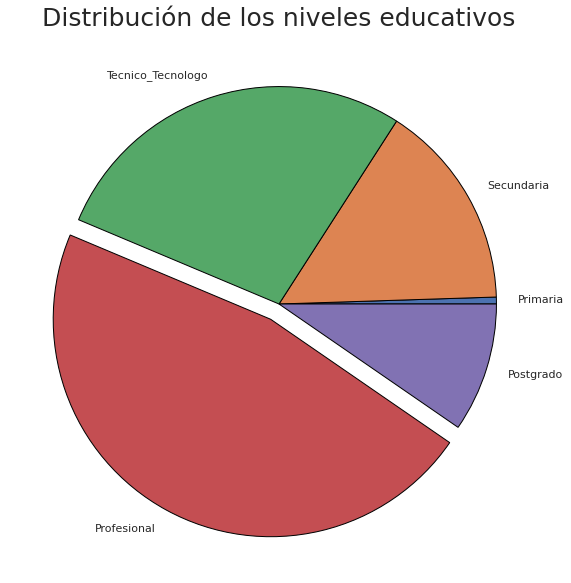

In [39]:
labels= ['Primaria','Secundaria','Tecnico_Tecnologo','Profesional','Postgrado']
sizes= [t_primaria, t_secundaria, t_tec, t_profesional, t_postgrado]
colors= ['#1796DA',]
explode = [0, 0, 0, 0.08, 0]

plt.figure(figsize=(15, 10))

plt.title("Distribución de los niveles educativos",fontsize=25)
plt.pie(sizes, labels=labels, explode= explode, wedgeprops={'edgecolor':'black'})
plt.show()

**Pre-conclusión =** 

La mayor parte de los jovenes contratados son Profesionales o Técnicos- Tecnólogos

**5**) distribución por edades

In [69]:
t_18= data['Edad 18-21'].sum()
t_22= data['Edad 22-24'].sum()
t_25= data['Edad 25-28'].sum()

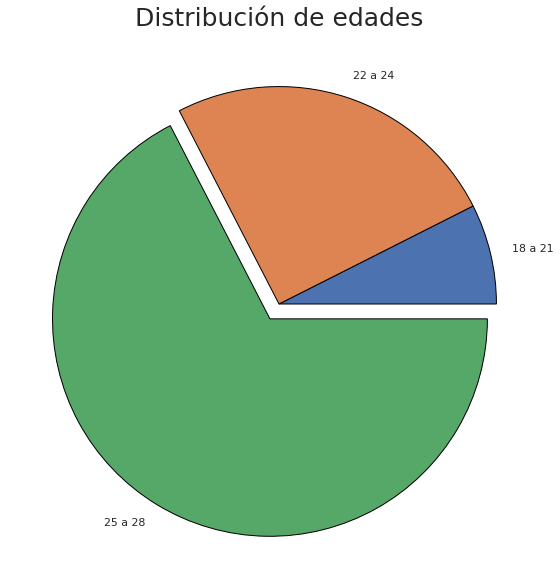

In [71]:
labels= ['18 a 21','22 a 24','25 a 28']
sizes= [t_18, t_22,t_25]
explode = [0, 0, 0.08]

plt.figure(figsize=(15, 10))

plt.title("Distribución de edades",fontsize=25)
plt.pie(sizes, labels=labels, explode= explode, wedgeprops={'edgecolor':'black'})
plt.show()

**6**)  Relación entre nivel educativo, genero y edad

En vista de que la mayoria de los jovenes son profesionales, técnicos o tecnólogos se evaluara la relación con las edades predominantes en los jovenes las cuales son un rango entre 25 y 28 años.

In [74]:
import plotly.express as px

fig = px.scatter_3d(data, x='Mujeres', y='Tecnico_Tecnologo', z='Edad 22-24' )
fig.show()

In [75]:
fig = px.scatter_3d(data, x='Hombres', y='Tecnico_Tecnologo', z='Edad 22-24' )
fig.show()

In [66]:
fig = px.scatter_3d(data, x='Edad 22-24', y='Profesional', z='Mujeres')
fig.show()

In [68]:
fig = px.scatter_3d(data, x='Edad 22-24', y='Profesional', z='Hombres')
fig.show()

In [77]:
fig = px.scatter_3d(data, x='Edad 25-28', y='Mujeres', z='Profesional')
fig.show()

**Pre-conclusión**

se puede evidenciar una estrecha correlación positiva entre las variables. Lo que interpreto como una tendencia a que aumente la cantidad de jovenes de ambos generos con educación superior* a medida que cumplen mas de 22 años (y antes de los 28).


*nota= los tecnicos y tecnologos, se consideran como grado 1 y dos de la educación formal superior.

# Geo-Map

In [97]:
data['Longitud'].describe()

count           1306
unique           546
top       -74.072092
freq             257
Name: Longitud, dtype: object

In [98]:
data['Latitud'].describe()

count         1306
unique         546
top       4.710989
freq           257
Name: Latitud, dtype: object

In [99]:
# Saber si hay nulos

data['Latitud'].isna().sum()
data['Longitud'].isna().sum()

0

In [100]:
# Convertir la columna Latitud y Longitud de str a float
data["Latitud"] = pd.to_numeric(data["Latitud"], downcast="float")
data["Longitud"] = pd.to_numeric(data["Longitud"], downcast="float")
type(data['Latitud'][0])

numpy.float32

In [101]:
# Mapa de colombia con la representacion juvenil en Colombia
folium_map = folium.Map(location=[ 4.710989, -74.072092],
                        zoom_start=6)

for i in range(0,1000):
  marker = folium.CircleMarker(location=[data["Latitud"][i],data["Longitud"][i]],radius=1,color="blue",fill=True)
  marker.add_to(folium_map)

folium_map

In [102]:
# Heatmap en el mapa de colombia con la representacion juvenil en Colombia
folium_map = folium.Map(location=[ 4.710989, -74.072092],
                        zoom_start=6)

hm_wide = HeatMap(list(zip(data['Latitud'], data['Longitud'])),
                  min_opacity = 0.2,
                  radius = 8,
                  blur = 6)

folium_map.add_child(hm_wide)

# Conclusión

Se concluye que la distribución juvenil en el gobierno es de la siguiente manera: jovenes (mayoritariamente mujeres) entre los 22 y 28 años, tecnicos-tecnologos o profesionales vinculados como contratistas.

Asi mismo se observo que la distribución de jovenes se centra en departamentos de la región Andina, la región Caribe y parte de la región pacifica. 

Siendo el departamento más destacado Bogotá; el cual tiene la mayor tasa de vinculación de jovenes que otras regiones.